In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
dataset = pd.read_csv('credit.csv')

# Check the first few rows of the data (optional)
print(dataset.head())


   ID  Age  Income  Credit History Employment Status  Loan Amount   \
0   1   25    50000           Good          Employed         20000   
1   2   34    75000           Fair          Employed         30000   
2   3   29    45000           Poor          Employed         15000   
3   4   41   100000      Excellent     Self-employed         50000   
4   5   22    38000           Good          Employed         12000   

  Marital Status Education Level Credit Worthiness  
0         Single        Bachelor          Approved  
1        Married          Master          Approved  
2         Single     High School            Denied  
3        Married             PhD          Approved  
4         Single        Bachelor          Approved  


Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



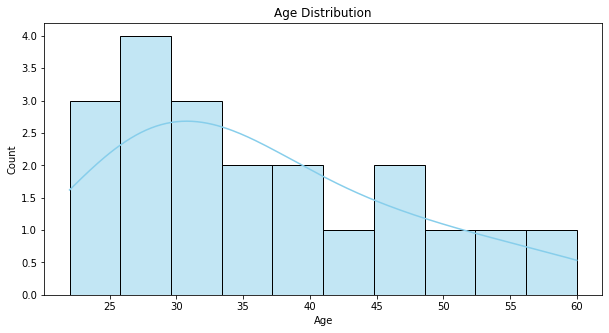

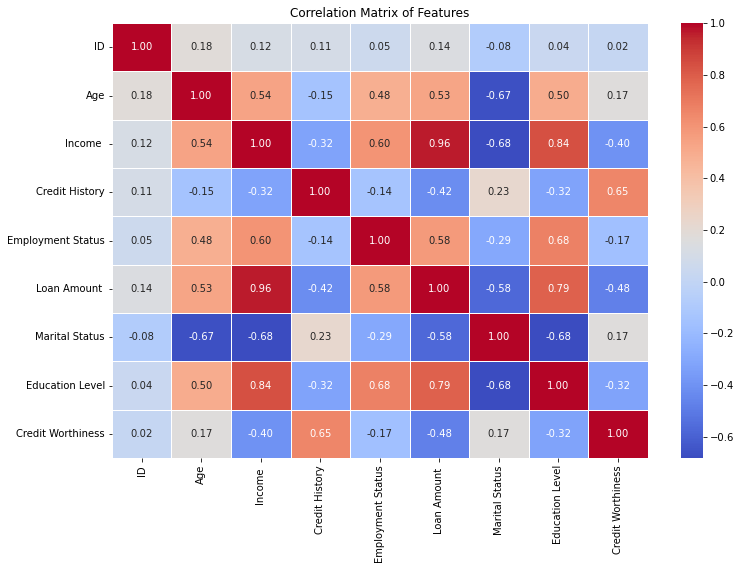

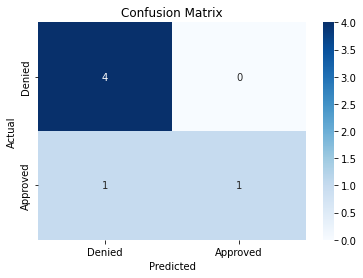

In [11]:
label_encoder = LabelEncoder()

# Encoding categorical columns (Employment Status, Credit History, Marital Status, Education Level, Credit Worthiness)
dataset['Employment Status'] = label_encoder.fit_transform(dataset['Employment Status'])
dataset['Credit History'] = label_encoder.fit_transform(dataset['Credit History'])
dataset['Marital Status'] = label_encoder.fit_transform(dataset['Marital Status'])
dataset['Education Level'] = label_encoder.fit_transform(dataset['Education Level'])
dataset['Credit Worthiness'] = label_encoder.fit_transform(dataset['Credit Worthiness'])  # Target variable

# Define independent (X) and dependent (y) variables
X = dataset.drop('Credit Worthiness', axis=1)  # Independent variables (features)
y = dataset['Credit Worthiness']  # Dependent variable (target)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)  # Only transform on test data

# Train the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Distribution of numerical features
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Age'], kde=True, color='skyblue', bins=10)
plt.title('Age Distribution')
plt.show()




# 3. Correlation Matrix of the numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 4. Confusion Matrix (to evaluate the SVM model's performance)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

